In [23]:
'''
2048 GAME PROJECT: Simple analysis of the DB data using pandas.

Date created:
    04/2022

Date edited:
    06/2022

Author:
    Filip J. Cierkosz
'''

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [24]:
# Connect with the DB and create a pandas dataframe for this purpose.
db = sqlite3.connect('../db/scores.db')
df = pd.read_sql_query("SELECT * FROM scores", db)

In [25]:
# Display the first 3 records from the DB.
df.head(3)

,id,grid_size,score,time_played_sec,date_played
0,0,3,8,2.498051,06 Mar 2022 09:35:18 PM
1,1,3,8,3.119032,06 Mar 2022 09:35:55 PM
2,2,3,32,37.503346,06 Mar 2022 09:36:42 PM


In [26]:
# Display the last 3 records from the DB.
df.tail(3)

,id,grid_size,score,time_played_sec,date_played
152,152,3,32,8.743135,25 Jun 2022 09:52:32 PM
153,153,3,32,5.624330,25 Jun 2022 09:55:31 PM
154,154,3,64,103.986846,25 Jun 2022 09:57:24 PM


In [27]:
# Calculate the mean for all grids.
df['score'].mean()

155.74193548387098

In [28]:
# Calculate the mean for 4x4 grid.
df4x4 = df[df['grid_size']==4]
df4x4['score'].mean()

324.83720930232556

In [29]:
# Calculate the median score for all grids (as integer).
df['score'].median().astype(int)

64

In [30]:
# Calculate the median score for 3x3 grid.
df3x3 = df[df['grid_size']==3]
df3x3['score'].median().astype(int)

32

In [31]:
# Calculate the standard deviation for the results.
df['score'].std()

375.43219836297754

In [32]:
# Calculate the standard deviation for the 4x4 grid.
df4x4 = df[df['grid_size']==4]
df4x4['score'].std()

287.37572305528937

In [33]:
# Count occurrences of different scores.
df.value_counts(['score'])

score
64       42
32       41
128      17
16       13
256      13
512      12
8        11
1024      4
4         1
4096      1
dtype: int64

In [34]:
# Count occurrences of different scores on 3x3 grid.
df3x3 = df[df['grid_size']==3]
df3x3.value_counts(['score'])

score
64       37
32       35
128      14
16       12
8        11
4         1
dtype: int64

In [35]:
# Get the mode for scores from all grids.
df['score'].mode()

0    64
Name: score, dtype: int64

In [36]:
# Get the average game time (seconds, 3 decimal places).
df['time_played_sec'].mean().round(decimals=3)

299.481

In [37]:
# Describe the dataset (excluding the 'id' column, as it would be meaningless).
fields = set(df.columns)-{'id'}
df_desc = df[list(fields)]
df_desc.describe()

,grid_size,time_played_sec,score
count,155.000000,155.000000,155.000000
mean,3.309677,299.481033,155.741935
std,0.516830,1123.849934,375.432198
min,3.000000,2.106998,4.000000
25%,3.000000,38.025468,32.000000
50%,3.000000,74.805979,64.000000
75%,4.000000,182.031669,128.000000
max,6.000000,13448.302297,4096.000000


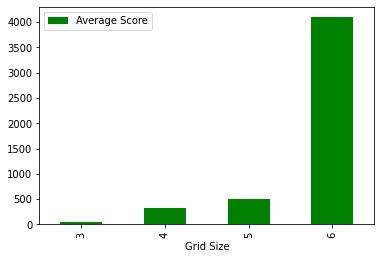

In [38]:
# Plot the diagram showing average scores on different grids.
data = {
    'Grid Size':[3,4,5,6],
    'Average Score':[
                        df[df['grid_size']==3]['score'].mean(),
                        df[df['grid_size']==4]['score'].mean(),
                        df[df['grid_size']==5]['score'].mean(),
                        df[df['grid_size']==6]['score'].mean()
                    ]
}
df_sc = pd.DataFrame(data, columns=['Grid Size','Average Score'])
df_sc.plot(x='Grid Size', y='Average Score', kind='bar', color='green')
plt.show()

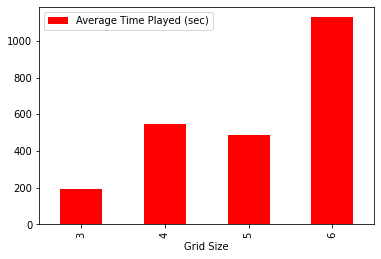

In [39]:
# Plot the diagram showing average time played on different grids.
data = {
    'Grid Size':[3,4,5,6],
    'Average Time Played (sec)':[
                        df[df['grid_size']==3]['time_played_sec'].mean(),
                        df[df['grid_size']==4]['time_played_sec'].mean(),
                        df[df['grid_size']==5]['time_played_sec'].mean(),
                        df[df['grid_size']==6]['time_played_sec'].mean()
                    ]
}
df_sc = pd.DataFrame(data,columns=['Grid Size','Average Time Played (sec)'])
df_sc.plot(x='Grid Size', y='Average Time Played (sec)', kind='bar',color='red')
plt.show()

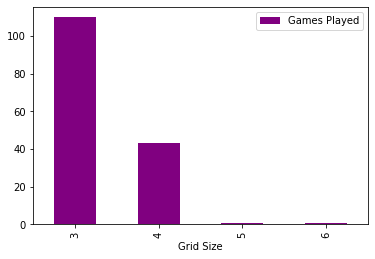

In [40]:
# Determine which grid is mostly used for games and represent it on a graph.
data_dict = df['grid_size'].value_counts().to_dict()
data = {
    'Grid Size':data_dict.keys(),
    'Games Played':data_dict.values()
}
df_sc = pd.DataFrame(data,columns=['Grid Size','Games Played'])
df_sc.plot(x='Grid Size', y='Games Played', kind='bar',color='purple')
plt.show()

<AxesSubplot:title={'center':'score'}, xlabel='grid_size'>

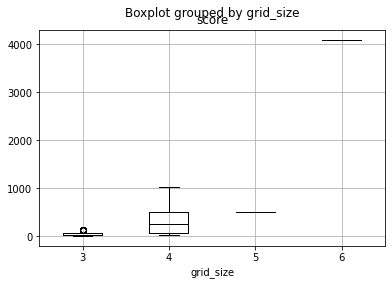

In [41]:
df.boxplot(by ='grid_size', column =['score'], color='black')

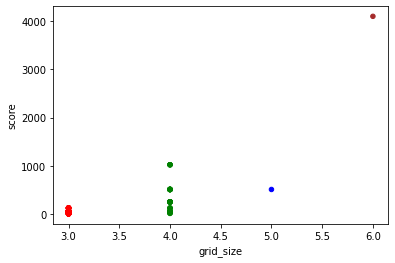

In [42]:
# Scatter diagram.
colors = {3:'red',4:'green',5:'blue',6:'brown'}
df['colors'] = df['grid_size'].map(colors)
df.plot.scatter(x='grid_size',y='score',color=df['colors']);

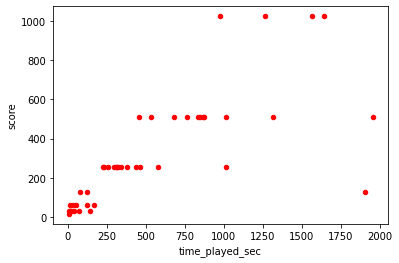

In [43]:
# Scatter diagram showing the relation between time played and obtained score for 4x4 grid.
df4x4 = df[df['grid_size']==4]
df4x4.plot.scatter(x='time_played_sec',y='score',color='red');

In [44]:
# Display only the records where the grid size is equal to 3 (exlude the column describing colors).
df3x3 = df[df['grid_size']==3]
df3x3.loc[:, df.columns!='colors']

,id,grid_size,score,time_played_sec,date_played
0,0,3,8,2.498051,06 Mar 2022 09:35:18 PM
1,1,3,8,3.119032,06 Mar 2022 09:35:55 PM
2,2,3,32,37.503346,06 Mar 2022 09:36:42 PM
3,3,3,4,3.539565,06 Mar 2022 09:36:58 PM
6,6,3,8,3.330225,06 Mar 2022 10:59:43 PM
...,...,...,...,...,...
150,150,3,16,2.917955,25 Jun 2022 09:30:06 PM
151,151,3,8,2.553026,25 Jun 2022 09:32:40 PM
152,152,3,32,8.743135,25 Jun 2022 09:52:32 PM
153,153,3,32,5.624330,25 Jun 2022 09:55:31 PM
